<a href="https://colab.research.google.com/github/pavankumarallu/K_ML/blob/main/Covid_vaccine_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/country_vaccinations.csv')

***Overview of the Dataset***

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [ ]:
df.daily_vaccinations = df.daily_vaccinations.fillna(0)

**Null Value Treatment in the Total_vaccinations Columns**
*   It treats the null values by taking the cumulative of the Daily vaccinations Column



In [ ]:
for i in range(1,len(df.daily_vaccinations)):
  if np.isnan(df.total_vaccinations[i]):
    df.total_vaccinations[i] = df.total_vaccinations[i-1]+df.daily_vaccinations[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                         0
people_vaccinated                       9753
people_fully_vaccinated                12248
daily_vaccinations_raw                 10989
daily_vaccinations                         0
total_vaccinations_per_hundred          8977
people_vaccinated_per_hundred           9753
people_fully_vaccinated_per_hundred    12248
daily_vaccinations_per_million           218
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


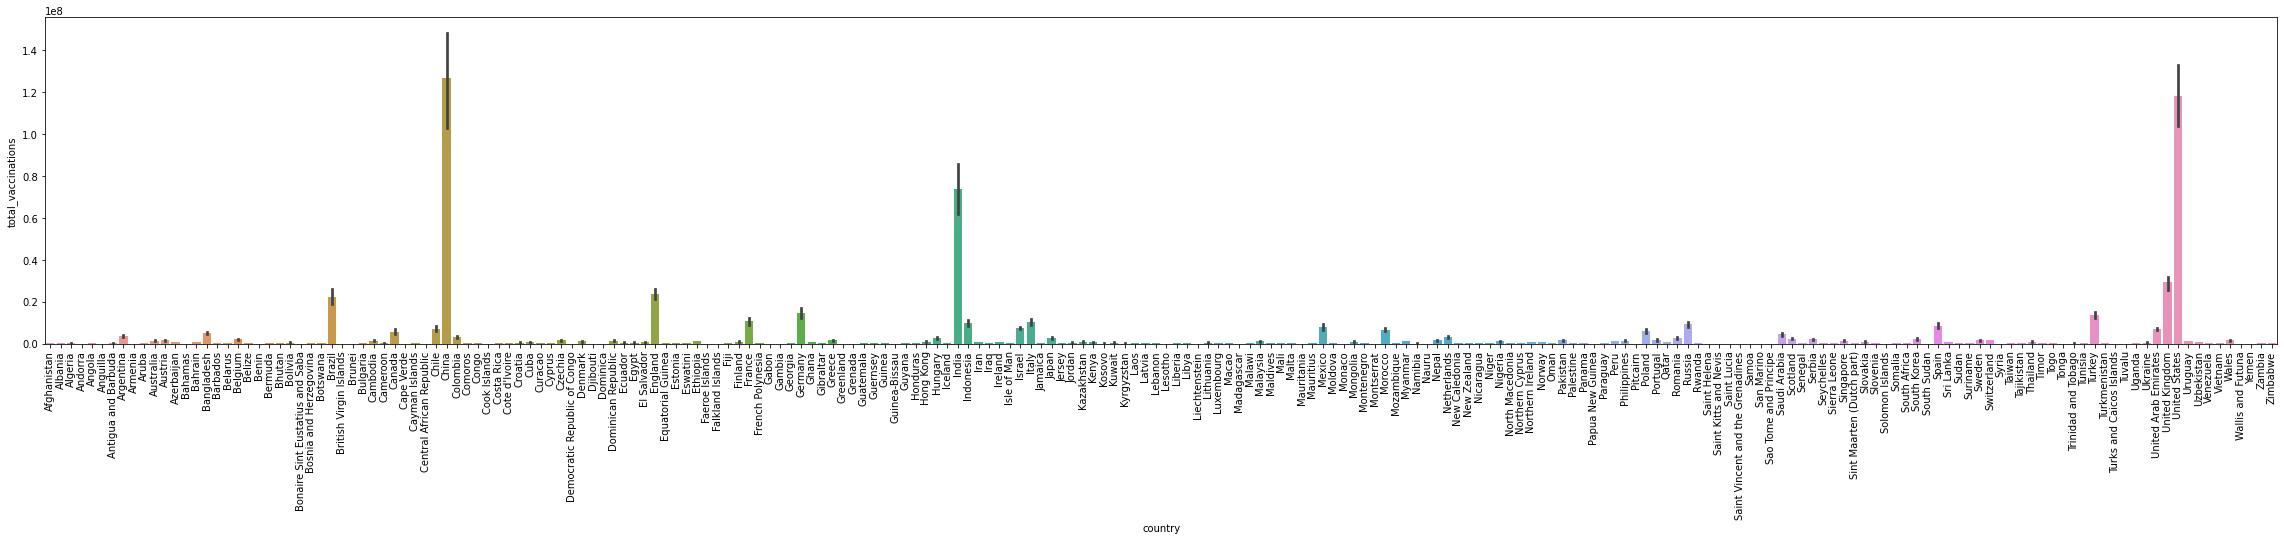

In [ ]:
figure(figsize = (40,6))
sns.barplot(df.country,df.total_vaccinations)
plt.xticks(rotation = 90)
plt.show()

**Total Vaccinations** in every country

---

*   The Last values of every country are stored in a list and formed a seperate dataframe





In [ ]:
d = []
for i in df.country.unique():
  array = np.array(df.loc[df.country == i]['total_vaccinations'])
  d.append(array[-1])
  
dic = {'Country':df.country.unique(),'Total_vaccinated':d}
df_total = pd.DataFrame(dic)
df_total.head()

,Country,Total_vaccinated
0,Afghanistan,590454.0
1,Albania,759043.0
2,Algeria,75000.0
3,Andorra,32317.0
4,Angola,859979.0


In [ ]:
df_total.isnull().sum()

Country             0
Total_vaccinated    0
dtype: int64

#Task2
**"What Countries Vaccinated More people ?"**


From the Below Graph it is observed that China vaccinated more people.





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


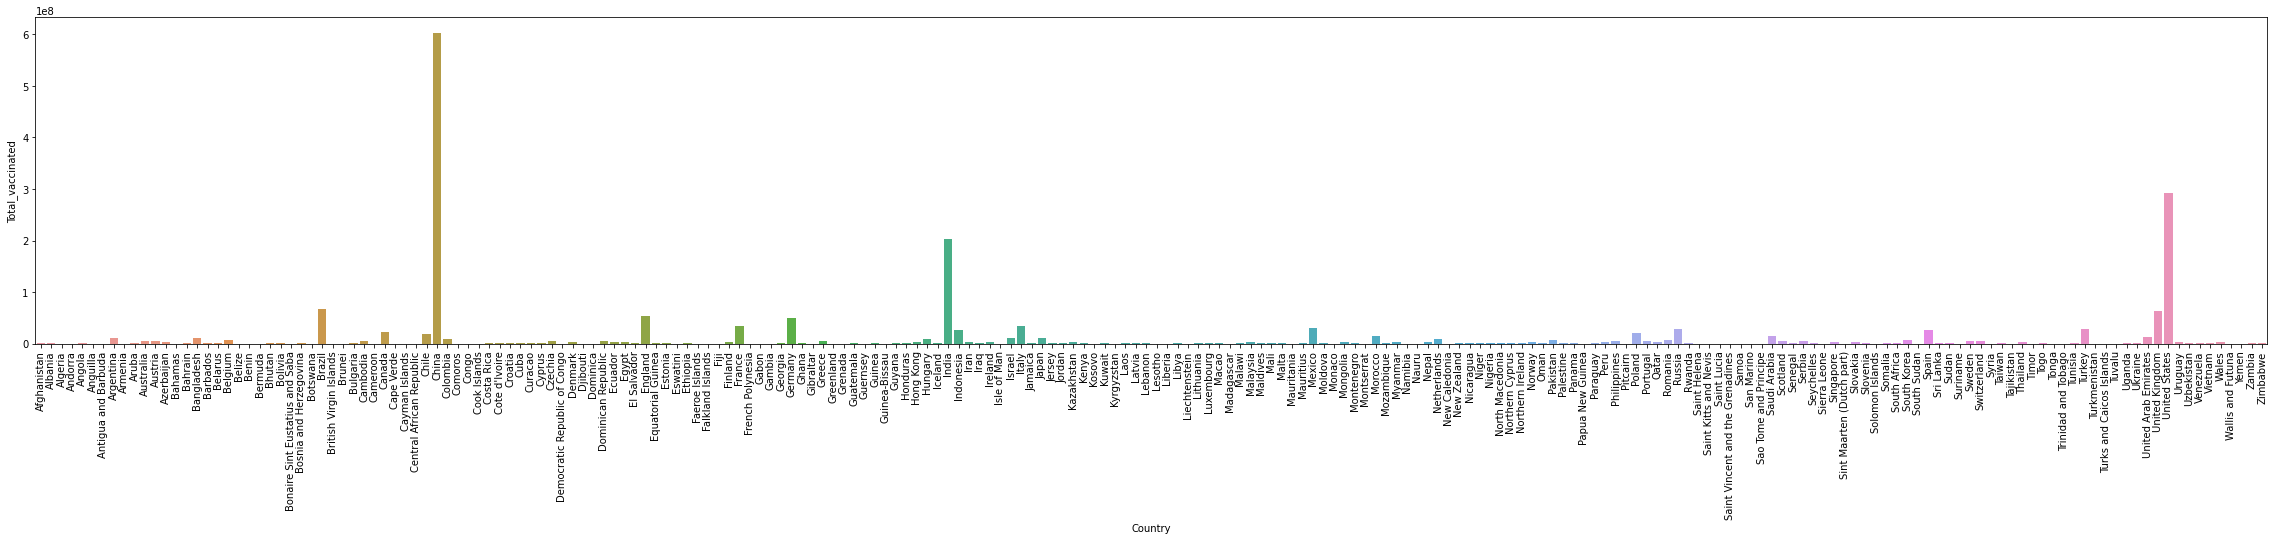

In [ ]:
figure(figsize = (40,6))
sns.barplot(df_total.Country,df_total.Total_vaccinated)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.daily_vaccinations_per_million.fillna(0)

0          0.0
1         35.0
2         35.0
3         35.0
4         35.0
         ...  
20918    968.0
20919    923.0
20920    888.0
20921    827.0
20922    854.0
Name: daily_vaccinations_per_million, Length: 20923, dtype: float64

#Task 3
**"Which Country Vaccinated More percent of their Population ?"**


From the Below Graph it is observed that gibraltar country hadd vaccinated more percentage of their population.

In [ ]:
dfs = []
for i in df.country.unique():
  array = np.array(df.loc[df.country == i]['people_fully_vaccinated_per_hundred'])
  dfs.append(array[-1])
dic = {'Country':df.country.unique(),'People_FullyVaccinated Percentage':dfs} 
percent_fulVaccinated = pd.DataFrame(dic)
percent_fulVaccinated 

,Country,People_FullyVaccinated Percentage
0,Afghanistan,0.29
1,Albania,9.63
2,Algeria,NaN
3,Andorra,6.09
4,Angola,0.60
...,...,...
209,Wales,34.29
210,Wallis and Futuna,34.95
211,Yemen,NaN
212,Zambia,0.03


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


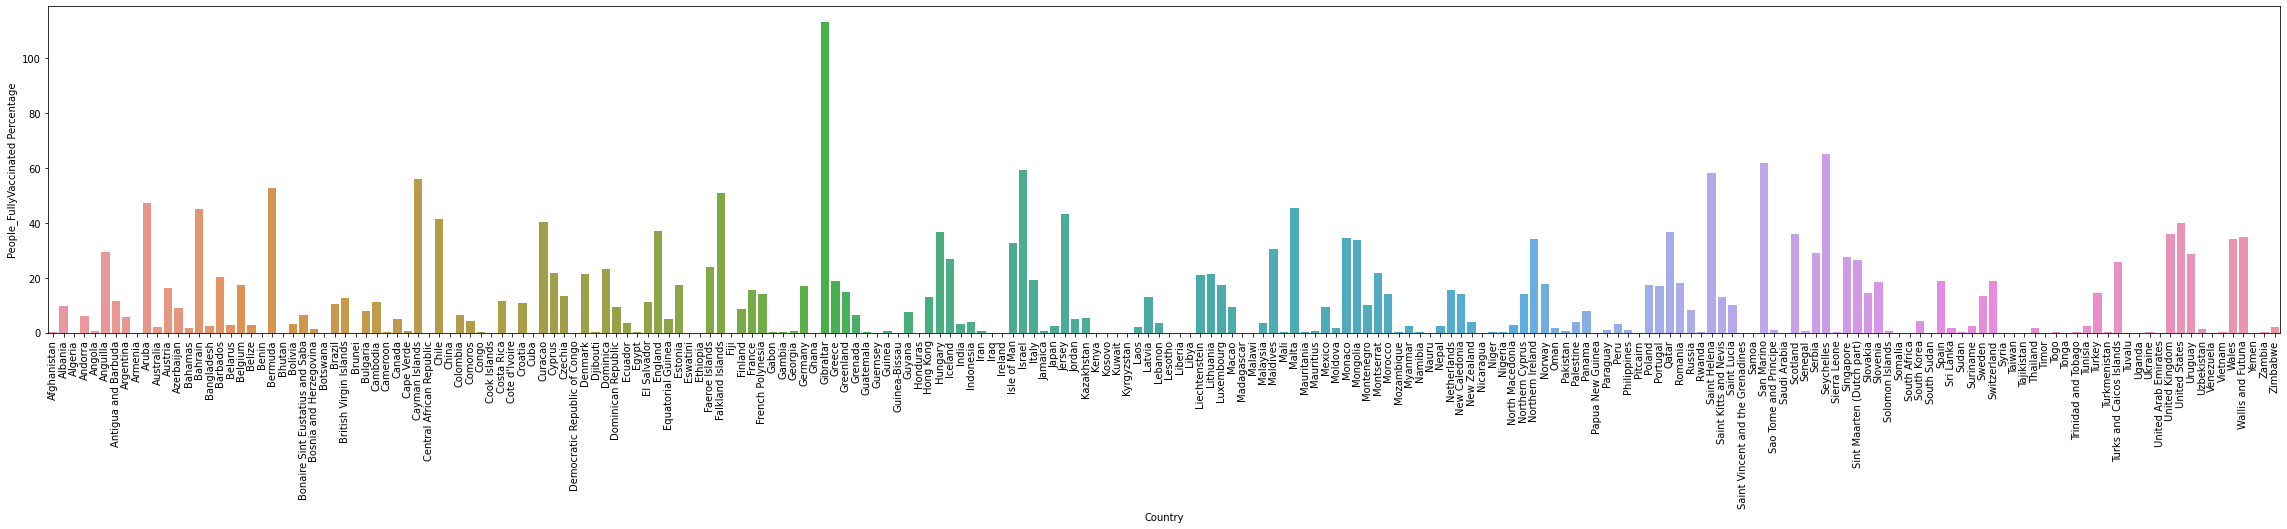

In [ ]:
figure(figsize = (40,6))
sns.barplot(percent_fulVaccinated.Country,percent_fulVaccinated['People_FullyVaccinated Percentage'])
plt.xticks(rotation = 90)
plt.show()